<a href="https://colab.research.google.com/github/vbloise3/deepLearning/blob/master/firstNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     |████████████████████████████████| 993kB 5.0MB/s 


Using TensorFlow backend.


Mounted at /content/gdrive
'395494_GUL_Req to End Coverage_GL.2002.102_rF.pdf'
'AWS re:Invent 2017 Registration Confirmation.pdf'
'AWS re:Invent Hotel Confirmation.pdf'
'Colab Notebooks'
 CrossOver
'Daily Notes - Aug 30, 2017.pdf'
 data
 data.txt
'Itinerary - AWS re:Invent - 2017.pdf'
"Mom's Hospital Rehabilitation Event.gsheet"
'My Saved Places.gmap'
 ScannerPro
'Ticketed Invoice - re:Invent - 2017.pdf'
'Vince Bloise Resume - 2017.docx'
'Vince Bloise Resume - 2018 c1.docx'
'Vince Bloise Resume - 2018 c1.pdf'
file contents: values, again!! and again!! and again!!
11493376/11490434 [==============================] - 1s 0us/step
train_images shape: (60000, 28, 28)
train_labels count: 60000
train_labels: [5 0 4 ... 5 6 8]


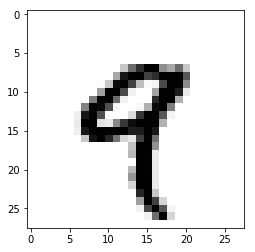

W0722 22:45:20.441729 139780958918528 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0722 22:45:20.496137 139780958918528 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0722 22:45:20.504172 139780958918528 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0722 22:45:20.545880 139780958918528 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0722 22:45:20.575846 139780958918528 deprecation_wrappe

a slice of the train_images tensor: (90, 28, 28)


W0722 22:45:20.803129 139780958918528 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2741: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.



10000/10000 [==============================] - 1s 99us/step
test_acc: 0.0919


In [0]:
# https://stackoverflow.com/questions/48376580/google-colab-how-to-read-data-from-my-google-drive
# data folder id 10iFjVs7hZokOYB03-jKS_YoWSU7g182h

!pip install -U -q PyDrive
from keras.datasets import mnist
from keras import models 
from keras import layers
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# ############ setup data folder for loading data for tensors ###########
from google.colab import drive

drive.mount('/content/gdrive')
!ls "/content/gdrive/My Drive"

with open('/content/gdrive/My Drive/data/data.txt', 'w') as f:
   f.write('values, again!! and again!! and again!!')
with open('/content/gdrive/My Drive/data/data.txt', 'r') as fr:
   fileContents = fr.read()
print(f"file contents: {fileContents}")
# ############ end of setup data folder for loading data for tensors ###########

def valid_imshow_data(data):
    data = np.asarray(data)
    if data.ndim == 2:
        return True
    elif data.ndim == 3:
        if 3 <= data.shape[2] <= 4:
            return True
        else:
            print('The "data" has 3 dimensions but the last dimension '
                  'must have a length of 3 (RGB) or 4 (RGBA), not "{}".'
                  ''.format(data.shape[2]))
            return False
    else:
        print('To visualize an image the data must be 2 dimensional or '
              '3 dimensional, not "{}".'
              ''.format(data.ndim))
        return False
      

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(f"train_images shape: {train_images.shape}") 
print(f"train_labels count: {len(train_labels)}")
print(f"train_labels: {train_labels}")

# Visualize one of the train images
digit = train_images[4]
valid_imshow_data(digit)
plt.imshow(digit, cmap=plt.cm.binary) 
plt.show()

# Take a slice of the train_images tensor
my_slice = train_images[10:100]
print(f"a slice of the train_images tensor: {my_slice.shape}") 

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,))) 
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

train_images = train_images.reshape((60000, 28 * 28)) 
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28)) 
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels) 
test_labels = to_categorical(test_labels)

# Train the network
#network.fit(train_images, train_labels, epochs=5, batch_size=128)

# Test the trained network
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc) 

